In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import glob
import math
import statistics
from scipy.stats import mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Load file with metadata and computational scores (from external_hyperlinearity_scores_plus_external2 notebook)

In [5]:
mcv4 = pd.read_excel("merged_scores_2023_updated.xlsx")

# Computational hyperlinearity vs clinical hyperlinearity

In [6]:
mcv4.head(1)
absent_h = mcv4[mcv4['clinical_hyperlinearity'] == 0]
mild_h = mcv4[mcv4['clinical_hyperlinearity'] == 1]
moderate_h = mcv4[mcv4['clinical_hyperlinearity'] == 2]
severe_h = mcv4[mcv4['clinical_hyperlinearity'] == 3]

absent_thenar = absent_h['thenar_scores']
mild_thenar = mild_h['thenar_scores']
moderate_thenar = moderate_h['thenar_scores']
severe_thenar = severe_h['thenar_scores']



In [7]:
"""
Function for p-values using one-way ANOVA and Tukey correction
"""
def oneway_anova_and_tukey_pvalues_foursamples(a, b, c, d):
    F, p = f_oneway(a, b, c, d)
    print('Statistics=%.3f, p=%.3f' % (F, p))
    scores = a + b + c + d
    group = []
    for i in range(len(a)):
        group.append('absent')
    for i in range(len(b)):
        group.append('mild')
    for i in range(len(c)):
        group.append('moderate')
    for i in range(len(d)):
        group.append('severe')
    df = pd.DataFrame({'score': scores, 'group': group})
    tukey = pairwise_tukeyhsd(endog=df['score'],
                             groups=df['group'],
                             alpha=0.05)
    print(tukey)  

In [8]:
st_dev = np.std(absent_thenar)
print(round(np.mean(absent_thenar)))
print("Standard deviation of the thenar wt 0.02: " + str(round(st_dev)))
print(" ")

print(round(np.mean(mild_thenar)))
st_dev = np.std(mild_thenar)
print("Standard deviation of the thenar -/+ 0.02: "  + str(round(st_dev)))
print(" ")

print(round(np.mean(moderate_thenar)))
st_dev = np.std(moderate_thenar)
print("Standard deviation of the thenar -/- 0.02: "  + str(round(st_dev)))
print(" ")

print(round(np.mean(severe_thenar)))
st_dev = np.std(severe_thenar)
print("Standard deviation of the thenar -/- 0.02: "  + str(round(st_dev)))

14778
Standard deviation of the thenar wt 0.02: 2398
 
17210
Standard deviation of the thenar -/+ 0.02: 3779
 
22240
Standard deviation of the thenar -/- 0.02: 4942
 
30703
Standard deviation of the thenar -/- 0.02: 6747


In [9]:
list_thenar_absent_scores = list(absent_thenar)
list_thenar_mild_scores  = list(mild_thenar)
list_thenar_moderate_scores  = list(moderate_thenar)
list_thenar_severe_scores  = list(severe_thenar)


print(round(np.mean(list_thenar_absent_scores)))
print(round(np.mean(list_thenar_mild_scores)))
print(round(np.mean(list_thenar_moderate_scores)))
print(round(np.mean(list_thenar_severe_scores)))

oneway_anova_and_tukey_pvalues_foursamples(list_thenar_absent_scores, list_thenar_mild_scores,
         list_thenar_moderate_scores, list_thenar_severe_scores)

F, p = f_oneway(list_thenar_absent_scores, list_thenar_mild_scores,
                list_thenar_moderate_scores, list_thenar_severe_scores)
print('Statistics=%.3f, p=%.3f' % (F, p))



14778
17210
22240
30703
Statistics=175.424, p=0.000
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  absent     mild  2432.5608 0.0896  -242.3253  5107.4468  False
  absent moderate  7462.4537    0.0  4681.5423 10243.3651   True
  absent   severe 15925.4459    0.0 12936.2334 18914.6584   True
    mild moderate   5029.893    0.0  3833.9664  6225.8195   True
    mild   severe 13492.8851    0.0 11870.4909 15115.2794   True
moderate   severe  8462.9922    0.0   6671.173 10254.8113   True
----------------------------------------------------------------
Statistics=175.424, p=0.000


In [10]:
scores = []
scores = list_thenar_absent_scores + list_thenar_mild_scores +list_thenar_moderate_scores  + list_thenar_severe_scores

group = []
for i in range(len(list_thenar_absent_scores)):
    group.append('absent')
for i in range(len(list_thenar_mild_scores )):
    group.append('mild')
for i in range(len(list_thenar_moderate_scores)):
    group.append('moderate')
for i in range(len(list_thenar_severe_scores)):
    group.append('severe')
df_p = pd.DataFrame({'score': scores, 'group': group})
tukey = pairwise_tukeyhsd(endog=df_p['score'],
                         groups=df_p['group'],
                         alpha=0.05)
print(tukey)  




      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  absent     mild  2432.5608 0.0896  -242.3253  5107.4468  False
  absent moderate  7462.4537    0.0  4681.5423 10243.3651   True
  absent   severe 15925.4459    0.0 12936.2334 18914.6584   True
    mild moderate   5029.893    0.0  3833.9664  6225.8195   True
    mild   severe 13492.8851    0.0 11870.4909 15115.2794   True
moderate   severe  8462.9922    0.0   6671.173 10254.8113   True
----------------------------------------------------------------


In [11]:
"""
Use scores above to set significance levels
0 = absent
1 = mild
2 = moderate
3 = severe
"""
result01 = "NS"
result12 = "***"
result13 = "***"
result02 = "***"
result03 = "***"
result23 = "***"




In [12]:
def add_stats_clinical_hyperlinearity():
    h = 2
    col = 'k'

    ###COMPARISON 0 AND 3
    x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.35 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result03, ha='center', va='bottom', color=col)

    ###COMPARISON 0 AND 2
    x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.28 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)

    ###COMPARISON 1 AND 3
    x1, x2 = 1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.16 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result13, ha='center', va='bottom', color=col)

    ###COMPARISON 0 AND 1
    x1, x2 = 0, 1   
    y = a[ya].max() + (a[ya].max() * 0.20 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

    ###COMPARISON 2 AND 3
    x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.05 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result23, ha='center', va='bottom', color=col)

    ###COMPARISON 1 AND 2
    x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.09 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)

In [13]:
mcv4["clinical_hyperlinearity"].value_counts()


1    316
2    134
3     61
0     20
Name: clinical_hyperlinearity, dtype: int64

In [15]:
clinical_hyperlinearity_group_sizes_label = ['Absent\n(n=20)', 
                                             'Mild\n(n=316)', 
                                             'Moderate\n(n=134)', 
                                             'Severe\n(n=61)']
clinical_hyperlinearity_group_sizes_label_nonumbers = ['Absent', 
                                             'Mild', 
                                             'Moderate', 
                                             'Severe']

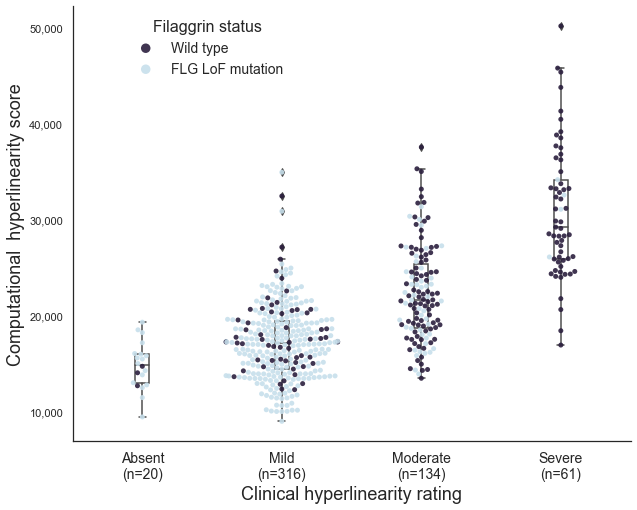

In [18]:

hue_graph_binary = 'flg_binary'
fig = plt.figure(figsize=(10,8))

ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=0.9, s=5, 
                   hue=hue_graph_binary, palette=colours)

sns.boxplot(x=xa, y=ya, data=a, width=0.1, ax=ax, 
                boxprops={'facecolor':'None'})
sns.set(style="white")
if group_sizes_on_x:
    plt.xticks([0, 1, 2, 3], clinical_hyperlinearity_group_sizes_label, fontsize=14)  # Add fontsize here
else:
    plt.xticks([0, 1, 2, 3], ['Absent', 'Mild', 'Moderate', 'Severe'], fontsize=14)  # Add fontsize here

ax.set_xlabel('Clinical hyperlinearity rating', fontsize=18)
ax.set_ylabel('Computational  hyperlinearity score', fontsize=18)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

legend = ax.legend(['Wild type', 'FLG LoF mutation'],title='Filaggrin status', loc='upper right', frameon=False,  ncol=1,
          bbox_to_anchor=(0.4, 1), fontsize=14, title_fontsize=16)
          
legend.legendHandles[0]._sizes = [90]
legend.legendHandles[1]._sizes = [90]

sns.despine()
plt.show()


In [ ]:
def add_stats_clinical_hyperlinearity():
    h = 2
    col = 'k'

    ###COMPARISON 0 AND 3
    x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.35 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result03, ha='center', va='bottom', color=col)

    ###COMPARISON 0 AND 2
    x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.28 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)

    ###COMPARISON 1 AND 3
    x1, x2 = 1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.16 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result13, ha='center', va='bottom', color=col)

    ###COMPARISON 0 AND 1
    x1, x2 = 0, 1   
    y = a[ya].max() + (a[ya].max() * 0.20 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

    ###COMPARISON 2 AND 3
    x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.05 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result23, ha='center', va='bottom', color=col)

    ###COMPARISON 1 AND 2
    x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.09 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)

In [ ]:

hue_graph_binary = 'flg_binary'
fig = plt.figure(figsize=(10,8))

ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=0.9, s=5, 
                   hue=hue_graph_binary, palette=colours)

sns.boxplot(x=xa, y=ya, data=a, width=0.1, ax=ax, 
                boxprops={'facecolor':'None'})
sns.set(style="white")
if group_sizes_on_x:
    plt.xticks([0, 1, 2, 3], clinical_hyperlinearity_group_sizes_label, fontsize=14)  # Add fontsize here
else:
    plt.xticks([0, 1, 2, 3], ['Absent', 'Mild', 'Moderate', 'Severe'], fontsize=14)  # Add fontsize here

ax.set_xlabel('Clinical hyperlinearity rating', fontsize=18)
ax.set_ylabel('Computational  hyperlinearity score', fontsize=18)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

legend = ax.legend(['Wild type', 'FLG LoF mutation'],title='Filaggrin status', loc='upper right', frameon=False,  ncol=1,
          bbox_to_anchor=(0.4, 1), fontsize=14, title_fontsize=16)
          
legend.legendHandles[0]._sizes = [90]
legend.legendHandles[1]._sizes = [90]

add_stats_clinical_hyperlinearity()
sns.despine()
plt.show()